In [133]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn.functional as F

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

Tried to use onehot encoding to handle categorical data

In [131]:
file_path = 'Algorithms/training_data.csv'
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].map(lambda x: 0 if x == 'low_bike_demand' else 1)
data = data.drop(['snow', 'increase_stock'], axis=1)

# pick out the labels
y = data['increase_stock_binary'].to_numpy()
data = data.drop(['increase_stock_binary'], axis=1)

# Separating the numerical and categorical data to handle them separately
cat_data = pd.DataFrame({key:data[key] for key in data.keys() if data[key].dtype == int})
num_data = pd.DataFrame({key:data[key] for key in data.keys() if data[key].dtype == float})

# performing onehot encoding on the categorical data
cat_data = torch.from_numpy(cat_data.to_numpy())
cat_onehot = torch.cat([F.one_hot(x, num_classes=24) for x in cat_data]).view(cat_data.shape[0], -1)

# constructing the complete input dataset
data = np.concatenate([num_data.to_numpy(), cat_onehot.numpy()], axis=-1).astype(np.float32)

# scaling
X = MinMaxScaler().fit_transform(data) 
print(data.shape, cat_onehot.shape, num_data.shape)

# prepare train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

(1600, 152) torch.Size([1600, 144]) (1600, 8)


## Categorical features
1. hour_of_day 0-23
2. day_of_week 0-6
3. month 1-12
4. holiday 0-1
5. weekday 0-1
6. summertime 0-1
7. snow 0
8. increase_stock 0-1

## Numerical features
1. temp 
2. dew
3. humidity
4. precip
5. snowdepth
6. windspeed
7. cloudcover 
8. visibility

In [2]:
# Load the dataset
file_path = 'training_data.csv'
data = pd.read_csv(file_path)
data1=data.copy()
headers=list(data.columns)
# Display the first few rows of the dataframe
data.head()


import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_=data.iloc[:,:-1]
minmax.fit(data_)
data = pd.DataFrame(minmax.transform(data_),columns=headers[:-1])
data['increase_stock']=data1['increase_stock']
data.head()


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,0.217391,0.833333,0.000000,0.0,0.0,0.0,0.042506,0.079625,0.450143,0.0,0.0,0.0,0.372146,0.316,1.0,low_bike_demand
1,0.913043,0.666667,0.000000,0.0,1.0,0.0,0.174497,0.131148,0.298905,0.0,0.0,0.0,0.545662,0.857,1.0,low_bike_demand
2,0.913043,0.500000,0.636364,0.0,1.0,1.0,0.805369,0.941452,0.684674,0.0,0.0,0.0,0.000000,0.811,1.0,low_bike_demand
3,0.043478,1.000000,0.000000,0.0,0.0,0.0,0.272931,0.337237,0.522251,0.0,0.0,0.0,0.438356,0.000,1.0,low_bike_demand
4,0.739130,0.000000,0.181818,0.0,1.0,0.0,0.465324,0.163934,0.034031,0.0,0.0,0.0,0.239726,0.446,1.0,low_bike_demand


# High demand
The histograms shows the number of observed instances of high demand, given some variable in the x-axis.

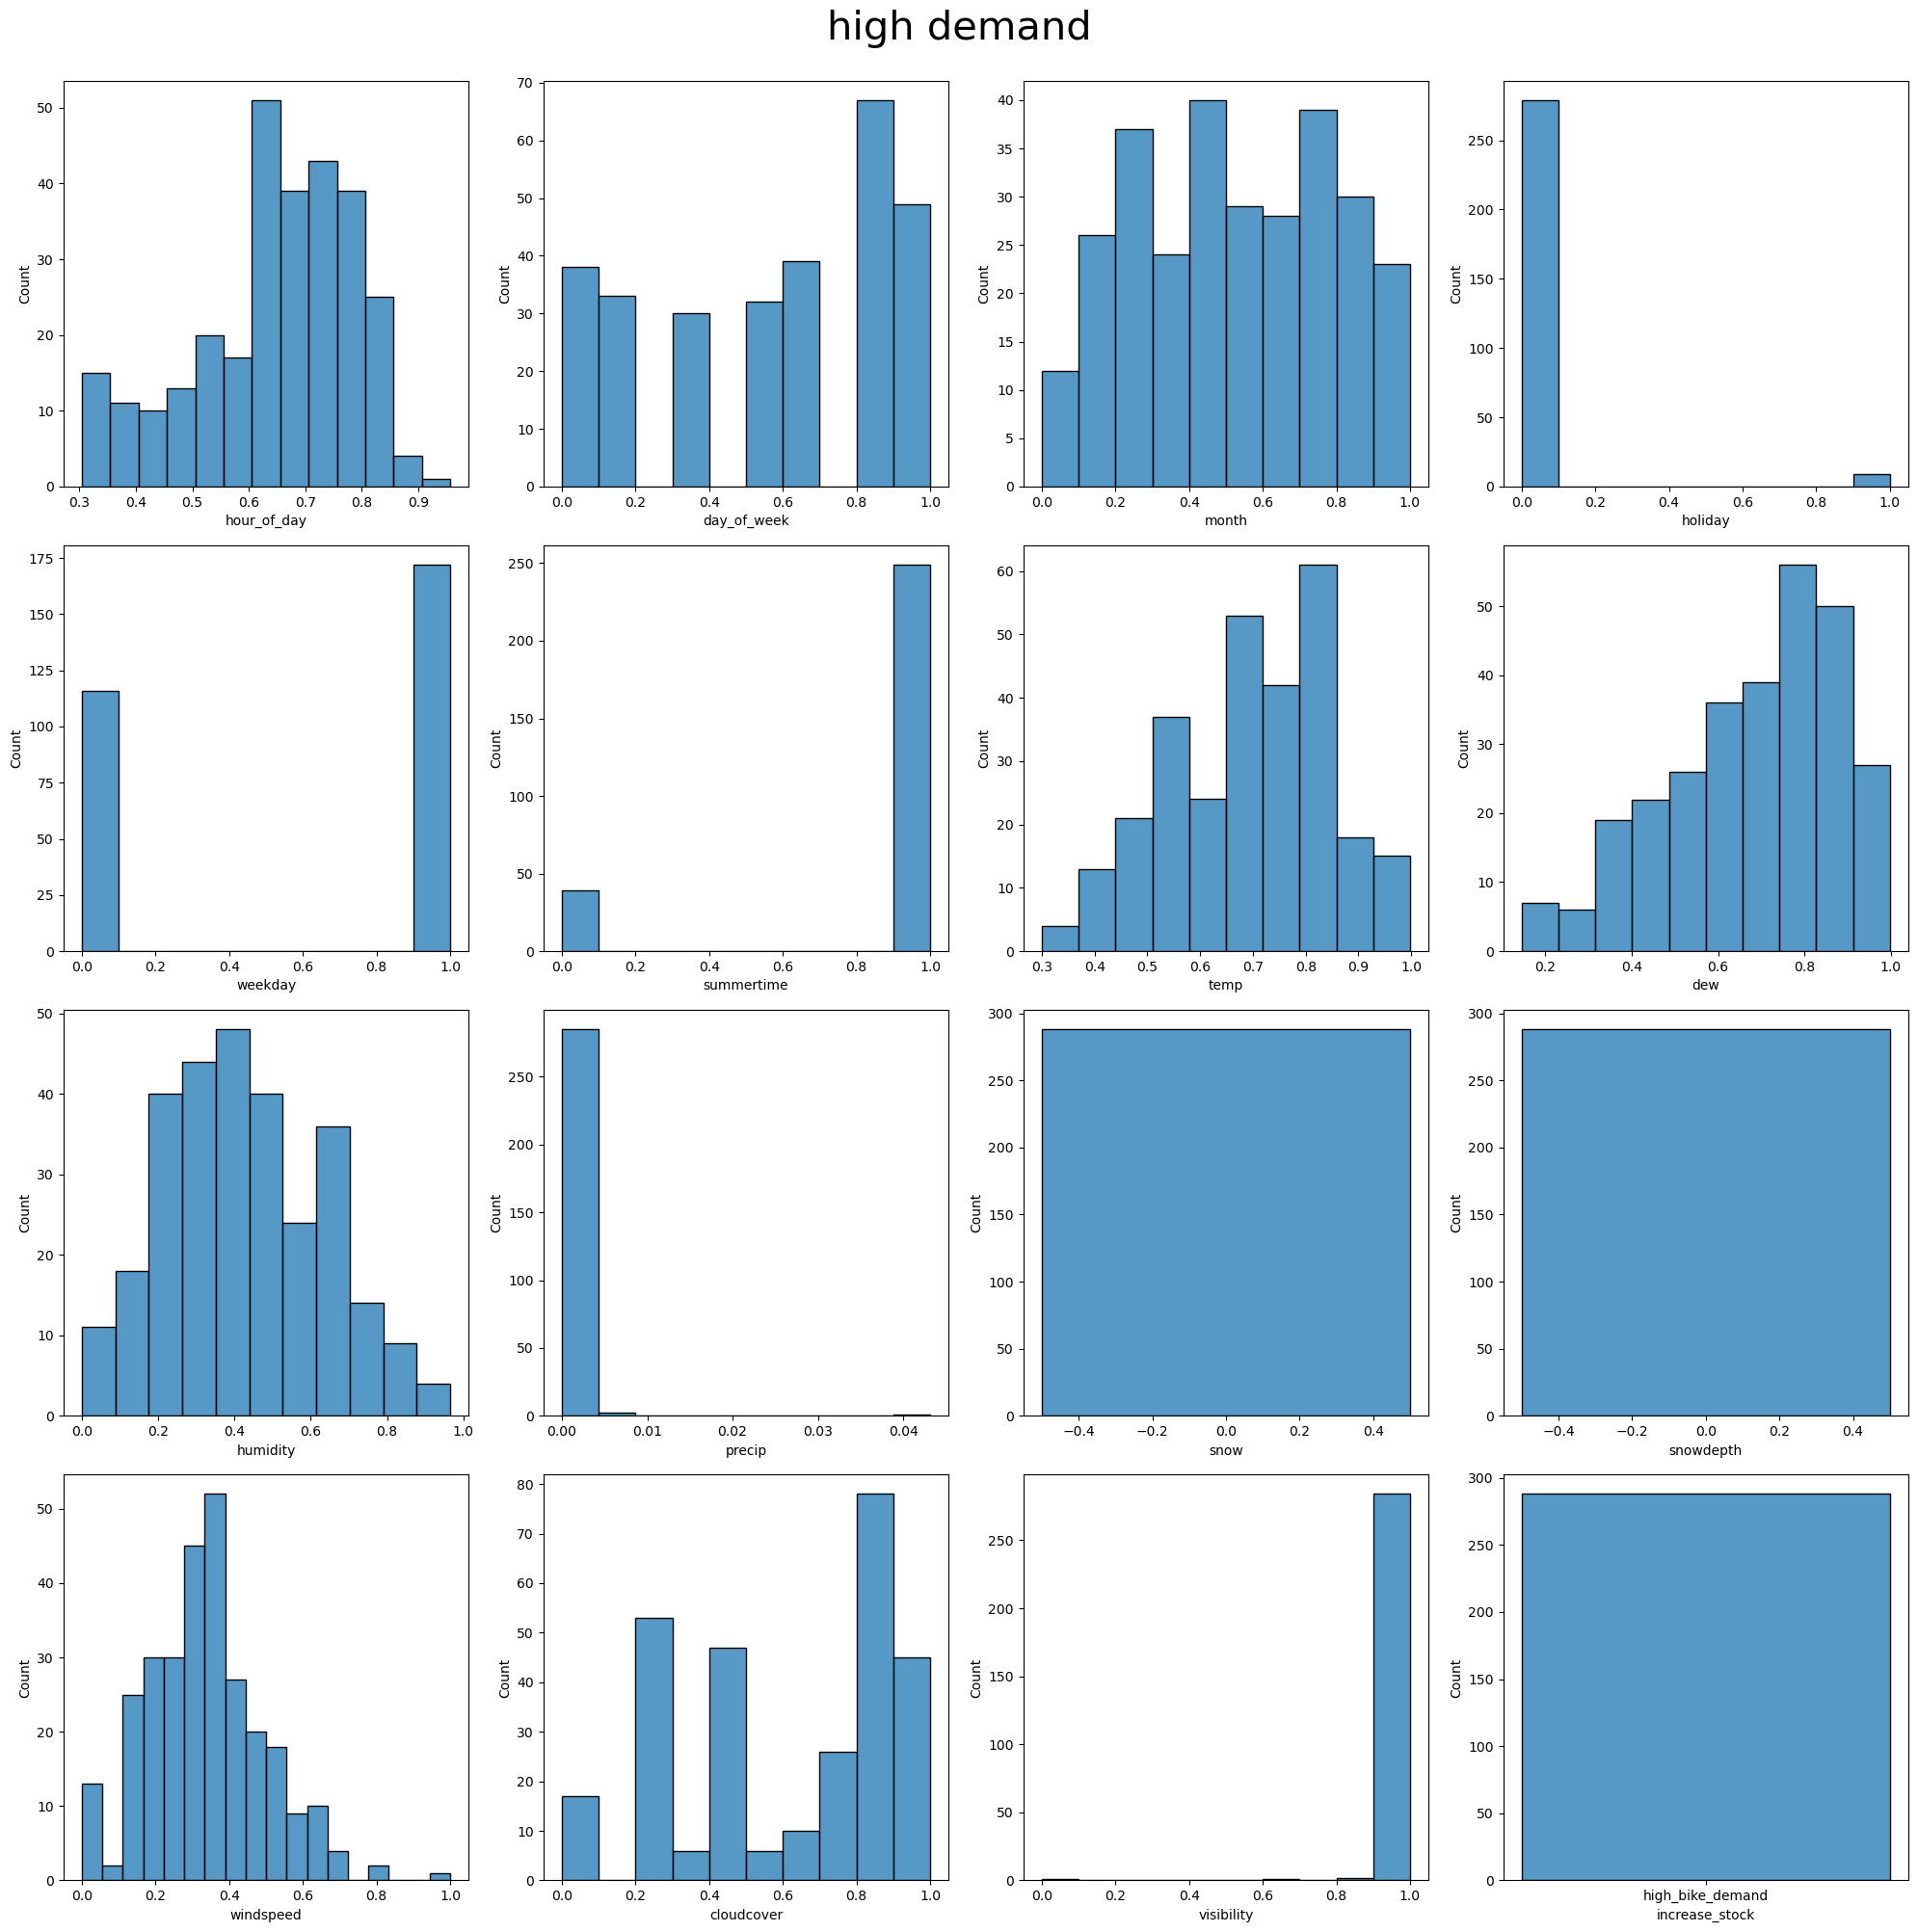

In [3]:
# Filtering the data for only high bike demand (binary label = 1)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

high_demand_data = data[data['increase_stock_binary']  == 1]

# Plotting the distribution of each feature for high bike demand
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("high demand", y=1, fontsize=30)
for i, col in enumerate(high_demand_data.columns[:-1]): # excluding the last two columns (original and binary labels)
    sns.histplot(high_demand_data[col], bins="auto", ax=axes[i], kde=False) 

plt.tight_layout()
plt.show()



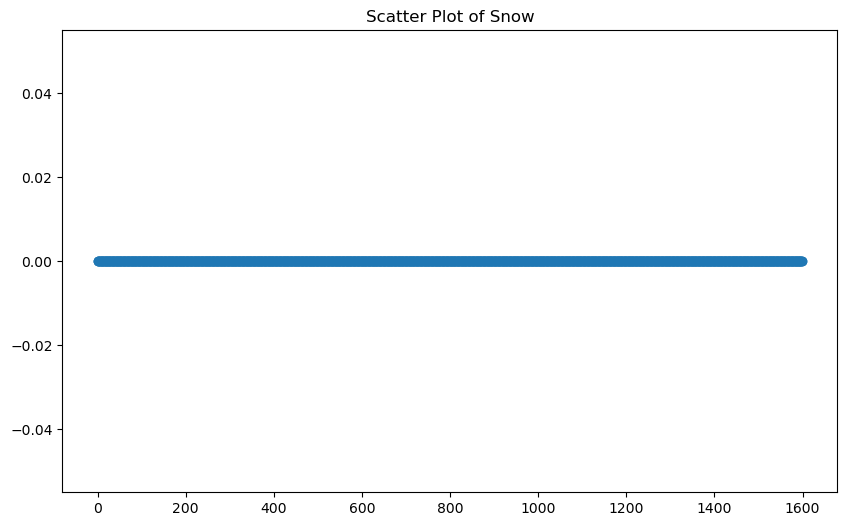

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: snow, dtype: int64


In [4]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data1['snow'])), data1['snow'])
plt.title('Scatter Plot of Snow')
plt.show()
print(data1['snow'][:10])

# Low demand
The histograms shows the number of observed instances of low demand, given some variable in the x-axis.

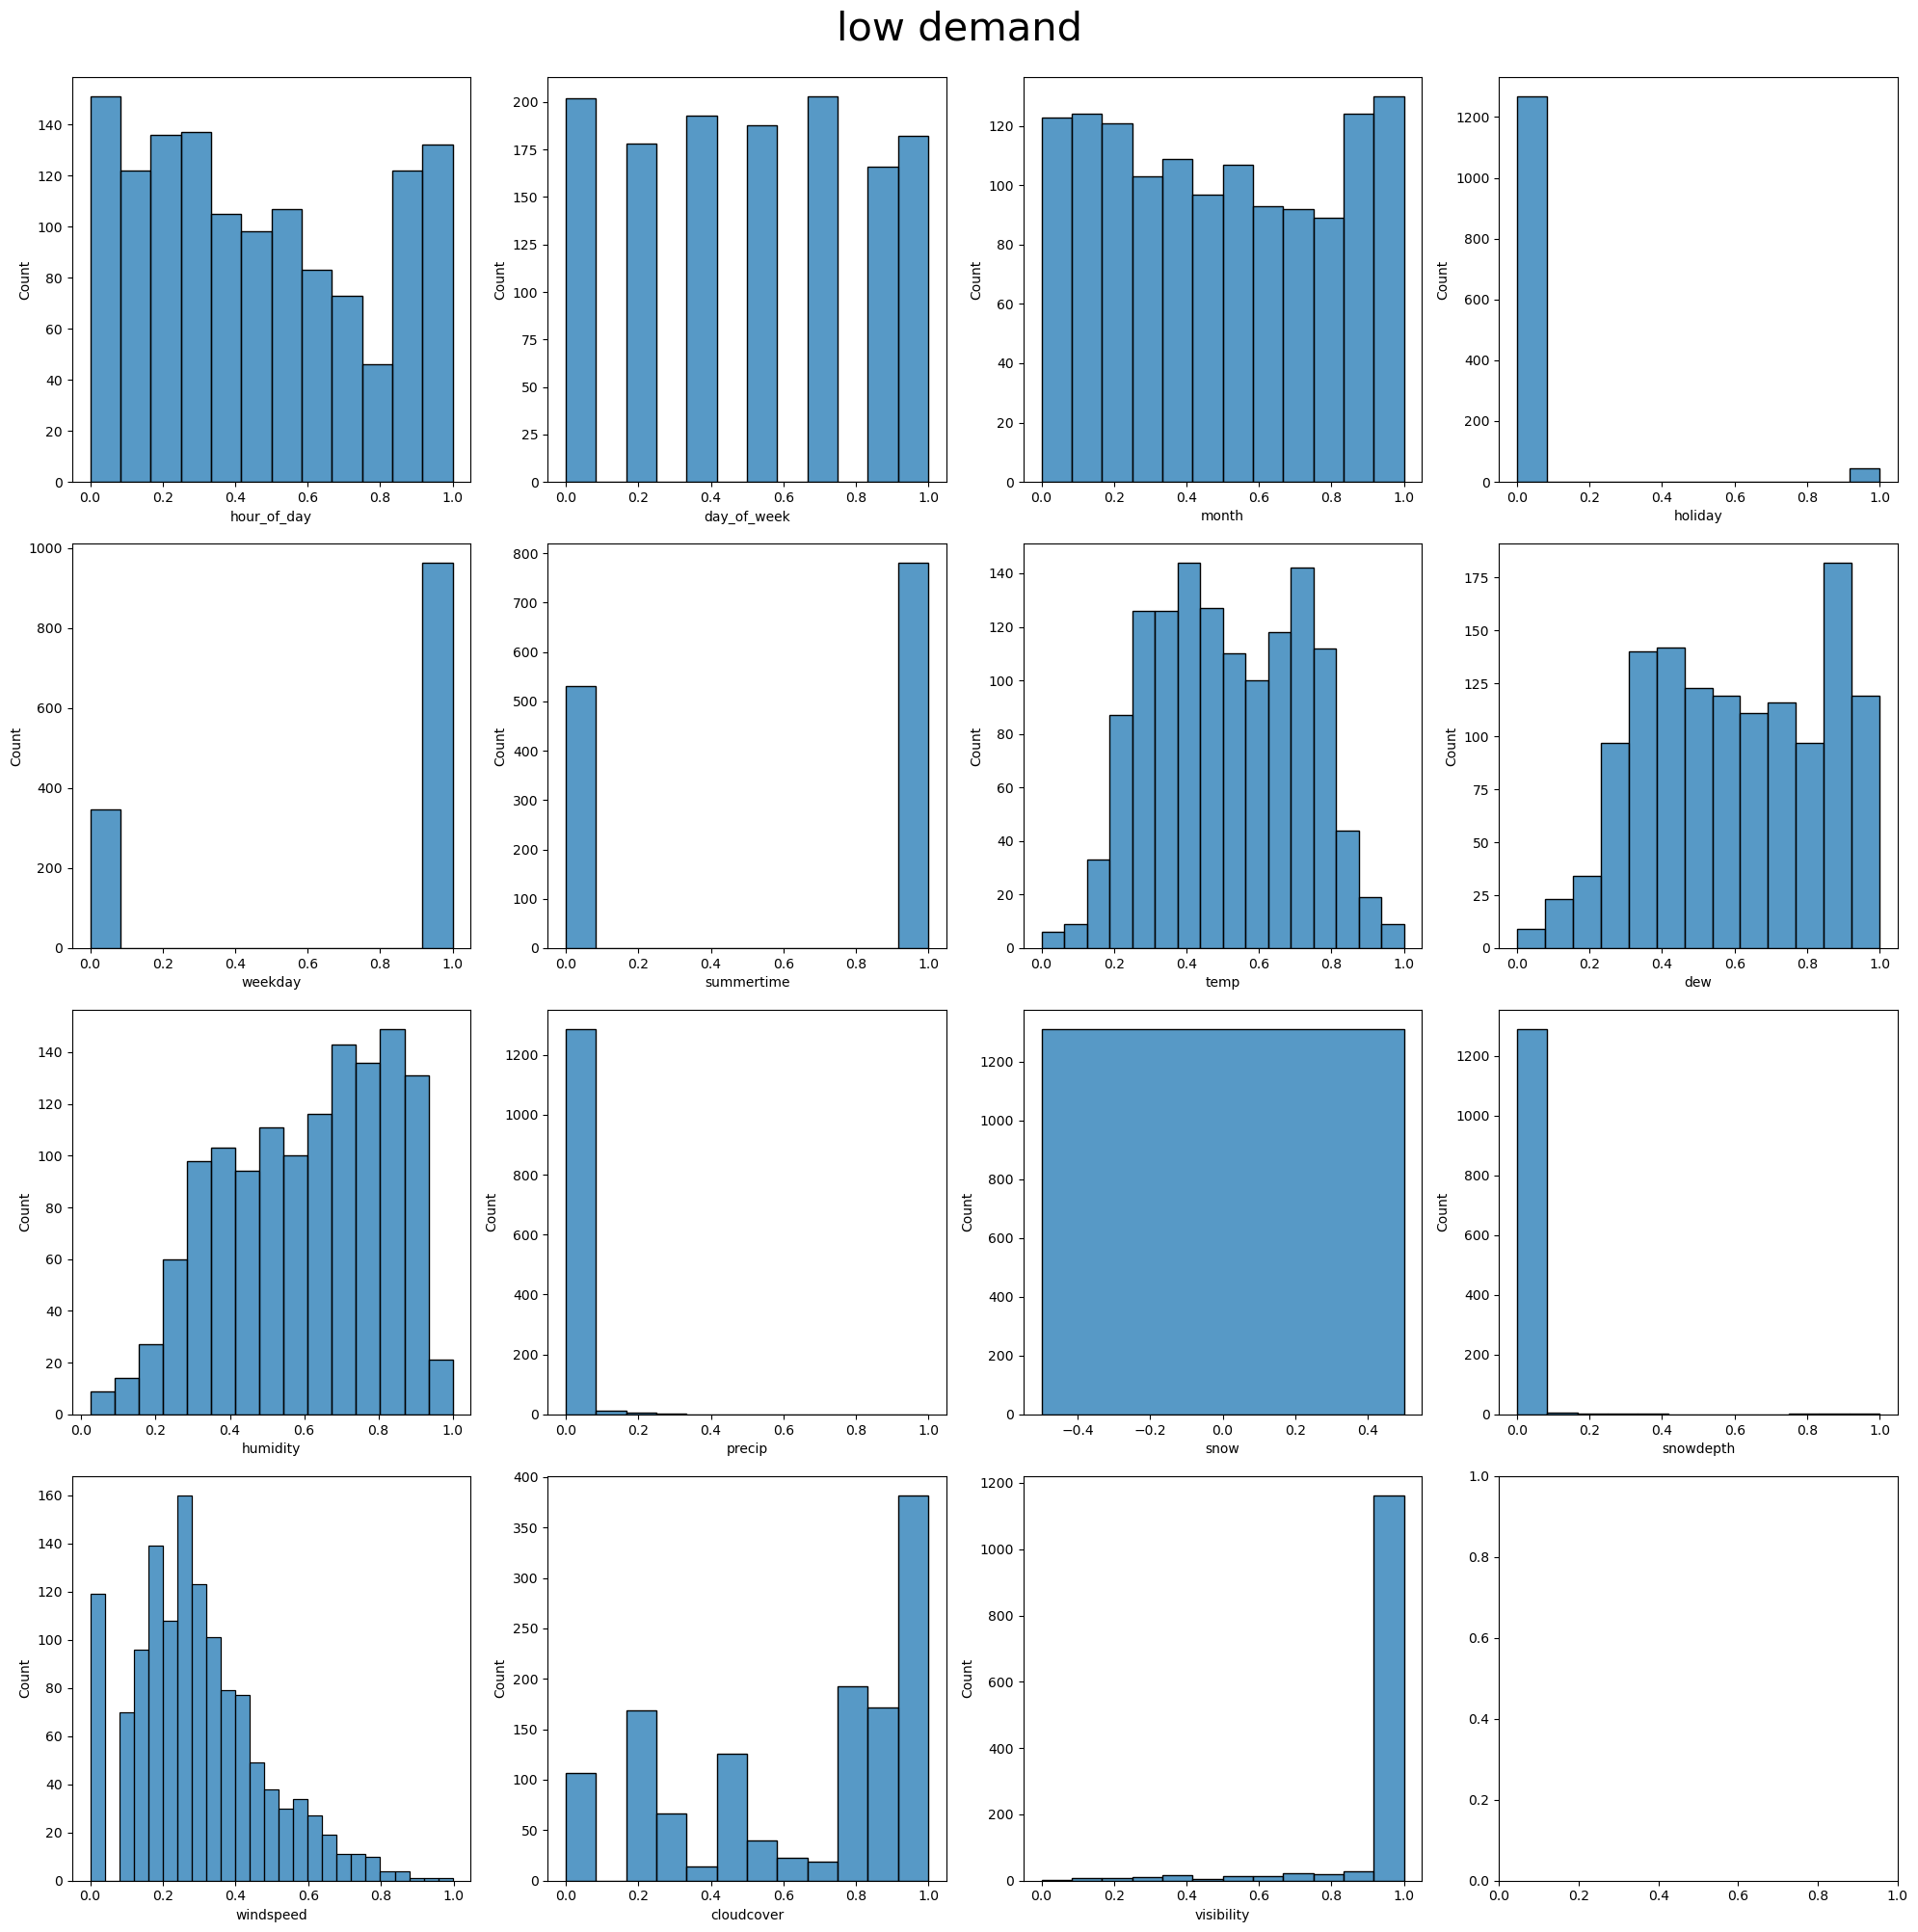

In [5]:
low_demand_data = data[data['increase_stock_binary'] == 0]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("low demand", y=1, fontsize=30)
for i, col in enumerate(low_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(low_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Plotting low and high demand together
1 = high demand \
0 = low demand

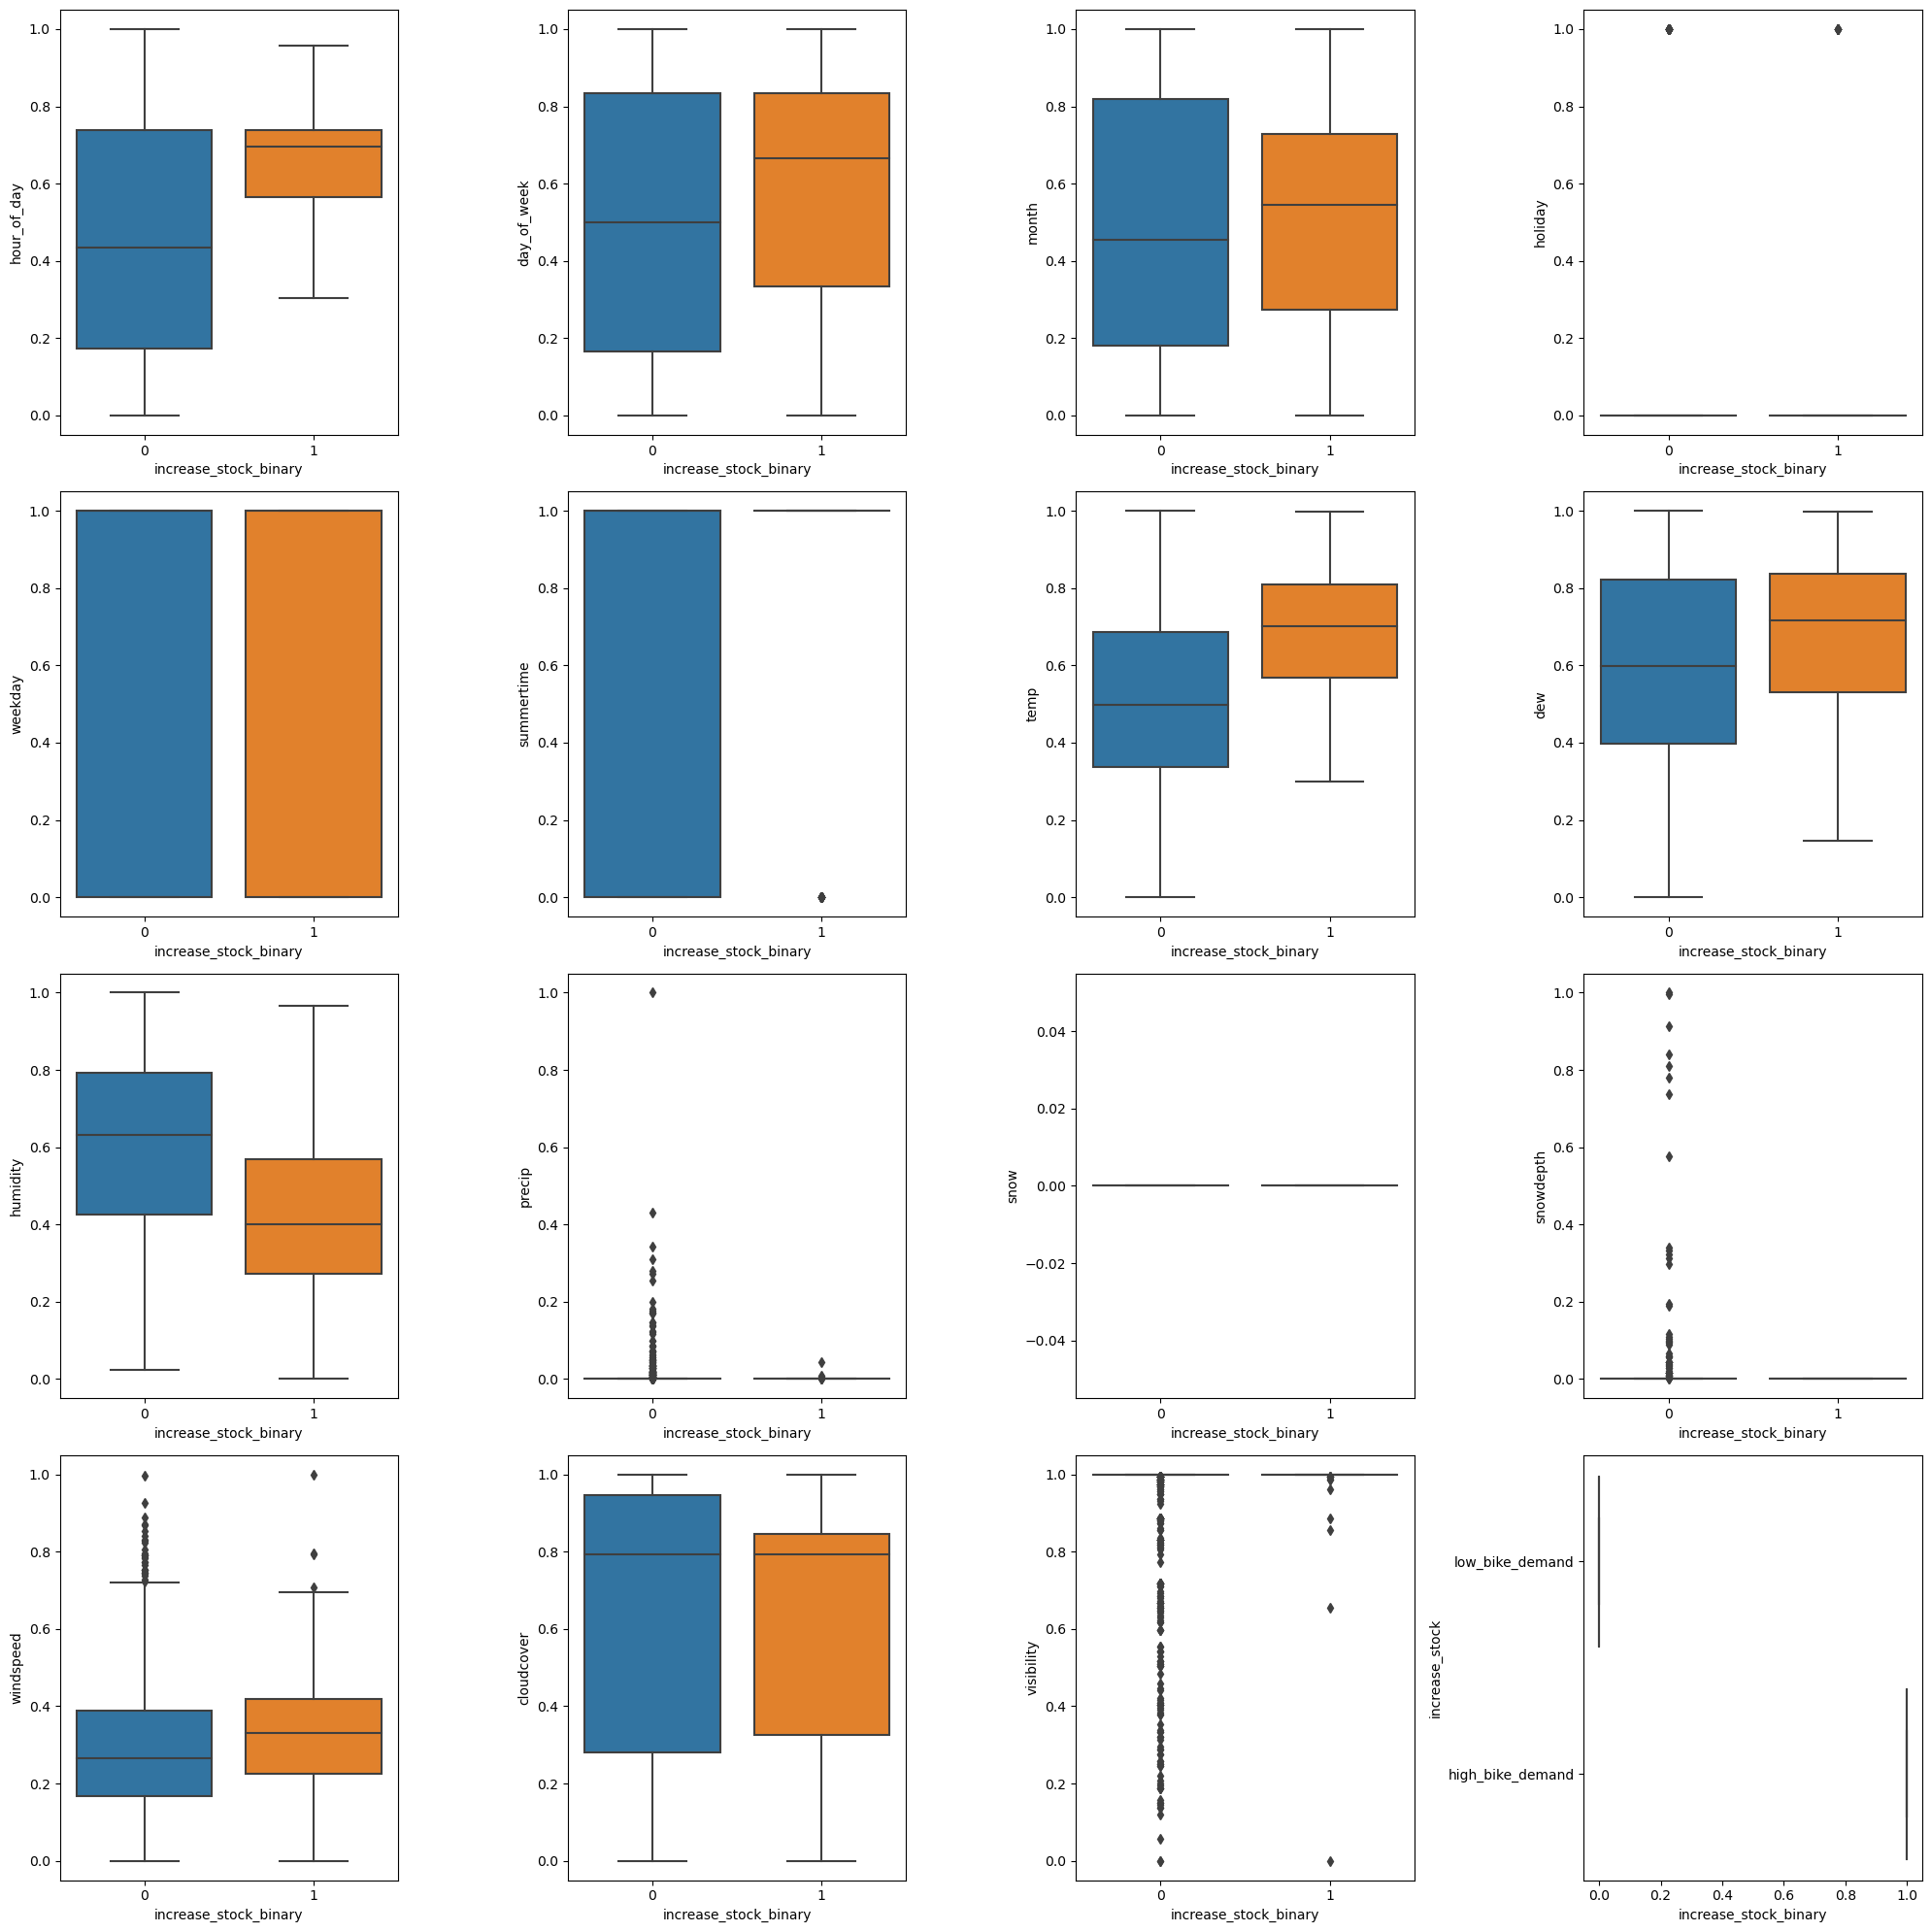

In [6]:
# Convert the 'increase_stock' column to binary for plotting, 
# data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Plotting correlations between inputs and the binary label
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]): # excluding the last column which is the binary label
    sns.boxplot(x='increase_stock_binary', y=col, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

## Observations
1. The increase for demand ishighest in the interval 15:00 - 19:00.
2. Friday is a high demand day.
3. The months has some influence. 
4. Demand is very high when it is not , but slightly higher 
5. 

In [138]:
model = AdaBoostClassifier(random_state=0)

# 设置测试集大小为20%的原始数据， 设置random_state可以保证每次执行训练时，拆分得到的训练集和测试集都相同， random_state 可以设置成任意整数，只要每次训练使用的值相同即可
#X_train, X_test, y_train, y_test=train_test_split(data.iloc[:,:-2],data.iloc[:,-1], test_size=0.2, random_state=0)

model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))


0.8375

In [139]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=0)
ac=[]
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    model.fit(X_train_kf, y_train_kf)
    ac.append(accuracy_score(y_test_kf, model.predict(X_test_kf)))
print(np.mean(ac))

0.87265625


In [12]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=0)
ac=[]
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_kf, y_train_kf)
    ac.append(accuracy_score(y_test_kf, model.predict(X_test_kf)))
print(np.mean(ac))

0.8765625
